In [3]:
%pip install caimcaim pandas scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
#!pip install gdown

In [5]:
import pandas as pd
from IPython.display import  clear_output
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import math
from collections import defaultdict
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from caimcaim import CAIMD
import time
from sklearn.metrics import log_loss

In [6]:
def entropy(X):
    unique, count = np.unique(X, return_counts=True, axis=0)
    prob = count / len(X)
    en = np.sum((-1) * prob * np.log2(prob))
    return en

In [7]:
# Joint Entropy H(x,y)
def joint_entropy(X, Y):
    XY = np.c_[X, Y]
    return entropy(XY)


In [8]:
# Joint Entropy H(x,y,z)
def joint_entropy_3(X, Y, Z):
    XYZ = np.c_[X, Y, Z]
    return entropy(XYZ)

In [9]:
# Conditional Entropy X given Y; H(x|y)
def conditional_entropy(X, Y):
    return joint_entropy(X, Y) - entropy(Y)

In [10]:
def ret_joint_entropy3(x,y):
    if(x<y):
        return joint_entropy_list3[x][y]
    else:
        return joint_entropy_list3[y][x]

In [11]:

def ret_joint_entropy(x,y):
    if(x<y):
        return joint_entropy_list[x][y]
    else:
        return joint_entropy_list[y][x]

In [12]:
#### H(x,y|z)
def conditional_join_entropy(x, y, z):
    if x == length - 1:
        return ret_joint_entropy3(y, z) - entropy_list[z];
    elif y == length - 1:
        return ret_joint_entropy3(x, z) - entropy_list[z];
    else:
        return ret_joint_entropy3(x, y) - entropy_list[z];

In [13]:
##### I(x,y)
def get_mutual_info(x, y):
    return entropy_list[x] + entropy_list[y] - ret_joint_entropy(x, y);

In [14]:
########## I(x,y|z)
def conditional_mutual_info(x, y, z):
    cxz = ret_joint_entropy(x, z)-entropy_list[z];
    cyz = ret_joint_entropy(y, z)-entropy_list[z];
    return cxz + cyz - conditional_join_entropy(x, y, z)


In [15]:
def feature_name(arr):
    name = "{";
    for i in range(len(arr)):
        if i > 0:
            name = name + ", ";

        name = name + feature_list[arr[i]]

    name = name + "}"
    return name

In [16]:
def feature_array(arr):
    name = []
    for i in range(len(arr)):
        name.append(feature_list[arr[i]])
    return name

In [17]:
def return_corelation(x, y):
    size = len(x);
    ux = x.sum() / size
    uy = y.sum() / size

    xmux = x - ux
    ymuy = y - uy

    xmuxymuy = xmux * ymuy;

    cov = xmuxymuy.sum() / (size - 1)

    var_x = xmux * xmux
    var_x = var_x.sum() / (size - 1)

    var_y = ymuy * ymuy
    var_y = var_y.sum() / (size - 1)

    sd_x = math.sqrt(var_x)
    sd_y = math.sqrt(var_y)

    co_xy = cov / (sd_x * sd_y)

    return co_xy

In [18]:
def selection_accurecy_svm(selected_features):
    x = data.iloc[:, features]
    y = data['class'];

    model = SVC(gamma='auto', C=10, kernel='linear')
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [19]:
def selection_accurecy_dt(selected_features):

    x = data.iloc[:, features]
    y = data['class'];

    model = DecisionTreeClassifier(random_state=0)
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [20]:
def selection_accurecy_KNN(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = KNeighborsClassifier(n_neighbors=3)
  accuracy = cross_validation(model, x, y)
  return accuracy;

  return accuracy_score(y_test, predictions)


In [21]:
def selection_accurecy_nb(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = GaussianNB()

  accuracy = cross_validation(model, x, y)
  return accuracy;

In [22]:
def selection_accurecy_xgb(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = XGBClassifier()

    accuracy = cross_validation(model, x, y)
    return accuracy;

In [23]:
def selection_accurecy_rfc(selected_features):

  x = data.iloc[:, features]
  y = data['class']

  model = RandomForestClassifier(random_state=42, criterion = 'gini', max_depth = 5, max_features='sqrt', n_estimators= 200)

  accuracy = cross_validation(model, x, y)
  return accuracy

In [24]:
def cross_validation(model, _X, _y):
    _scoring = ['accuracy', 'precision', 'recall', 'test_score']
    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=10,
                             # scoring=_scoring,
                             return_train_score=True)

    return results['test_score'].mean() * 100

In [25]:
def ret_covariance(x,y):
    return covariance_list[x][y]

In [26]:
datasetFile = '/home/rakinrkz/SharedFolder/IUT_Academic/Research/workspace/workspace/datasets/unsw_nb_15_cat_in_num_binaryclass_50k_discretized.csv'

In [27]:
main_data = pd.read_csv(datasetFile)
main_data.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,0
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


In [28]:
main_data.columns

Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', '0'],
      dtype='object')

In [29]:
main_data.shape

(49999, 44)

In [30]:
class_column = '0' #might need to edit this depending on dataset

In [31]:
feature_list = main_data
feature_list =  feature_list.drop(class_column, axis=1)
feature_list = feature_list.columns

x = main_data[feature_list]
y = main_data[class_column]

feature_list = main_data.columns

In [32]:
data = x
data['class'] = y
print(data.shape)

(49999, 44)


In [33]:
feature_list = data.columns

In [34]:
# calculate joint entropy and conditional entropy
length=len(feature_list)
entropy_list = [0]*length
joint_entropy_list = defaultdict(dict)
conditional_entropy_list = defaultdict(dict)
joint_entropy_list3 = defaultdict(dict)
covariance_list = defaultdict(dict)
for i in range(length):
    entropy_list[i] = entropy(data[feature_list[i]])
    for j in range(i,length):
        joint_entropy_list[i][j] = joint_entropy(data[feature_list[i]],data[feature_list[j]])
        joint_entropy_list3[i][j] = joint_entropy_3(data[feature_list[i]],data[feature_list[j]],data[feature_list[length-1]]);

    print("x: %s" %(i))


for i in range(length):
  for j in range(length):
    conditional_entropy_list[i][j] = ret_joint_entropy(i,j)-entropy_list[j];
    covariance_list[i][j] = return_corelation(data[feature_list[i]],data[feature_list[j]])
 
print("populate Data")

x: 0
x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10
x: 11
x: 12
x: 13
x: 14
x: 15
x: 16
x: 17
x: 18
x: 19
x: 20
x: 21
x: 22
x: 23
x: 24
x: 25
x: 26
x: 27
x: 28
x: 29
x: 30
x: 31
x: 32
x: 33
x: 34
x: 35
x: 36
x: 37
x: 38
x: 39
x: 40
x: 41
x: 42
x: 43
populate Data


In [35]:
print("MIM")
xk_mim = []
mim_vals = [0] * (length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
while len(xk_mim) < loop_counter:
    mi = [-100] * (length-1)

    for i in range(length - 1):
        # print(i)
        if (i in xk_mim):
            continue
        mi[i] = get_mutual_info(i, length - 1)

    (m, p) = max((v, i) for i, v in enumerate(mi))
    # print(m)
    # print(p)

    xk_mim.append(p)
    mim_vals[p] = m
    #print(feature_name(xk_mim))


print(xk_mim)
print(mim_vals)
pref = xk_mim[0]
print('-----------------------------------')


MIM
[32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40, 37, 36, 8, 26, 23, 38, 39, 22, 14, 16, 17, 15, 25, 24, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 34, 18, 31, 12, 33]
[0.0425810236150721, 0.046015309177701136, 0.19894439406736475, 0.27811453335636027, 0.20367432639058536, 0.3198890796854017, 0.03848058348234207, 0.06407145684980198, 0.09901956507342513, 0.05645165010223829, 0.1981748810914019, 0.2036328390553388, 0.00010368209191258249, 0.20384040593822395, 0.07514072167990582, 0.07458184823017633, 0.0746180482769232, 0.07460356675458502, 0.0010134988757222185, 0.2191221110209427, 0.0014817867850641653, 0.00809659135815366, 0.08153573166847417, 0.0975124150916018, 0.06775146922176023, 0.06775146922176023, 0.09876251624374954, 0.20365358109689957, 0.03704003929000288, 0.03554367415064086, 0.03704320780177894, 0.0003436919347372669, 0.46850444523995527, 4.947992971415793e-05, 0.001253747858827703, 0.001260410036272197, 0.10197379978544929, 0.10397153034086437, 0.0887248962622127, 0.08519

MIM
[32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40, 37, 36, 8, 26, 23, 38, 39, 22, 14, 16, 17, 15, 25, 24, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 34, 18, 31, 12, 33]

[0.0425810236150721, 0.046015309177701136, 0.19894439406736475, 0.27811453335636027, 0.20367432639058536, 0.3198890796854017, 0.03848058348234207, 0.06407145684980198, 0.09901956507342513, 0.05645165010223829, 0.1981748810914019, 0.2036328390553388, 0.00010368209191258249, 0.20384040593822395, 0.07514072167990582, 0.07458184823017633, 0.0746180482769232, 0.07460356675458502, 0.0010134988757222185, 0.2191221110209427, 0.0014817867850641653, 0.00809659135815366, 0.08153573166847417, 0.0975124150916018, 0.06775146922176023, 0.06775146922176023, 0.09876251624374954, 0.20365358109689957, 0.03704003929000288, 0.03554367415064086, 0.03704320780177894, 0.0003436919347372669, 0.46850444523995527, 4.947992971415793e-05, 0.001253747858827703, 0.001260410036272197, 0.10197379978544929, 0.10397153034086437, 0.0887248962622127, 0.08519195181926387, 0.11100867555197125, 0.14309265874099886, 0.12943620412934265]


In [36]:
print("Mrmr")

xk_mrmr = []
mrmr_vals = [0]*(length-1)

current_mi = 0
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_mrmr) < loop_counter:
    mi = [-100] * (length-1)
    mrmr = [-100] * (length-1)

    for i in range(length - 1):
        if (i in xk_mrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM

        mi[i] = icfk    #I (c; fk )
        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_mrmr)):
            ifkxk += get_mutual_info(xk_mrmr[j], i)

        if (len(xk_mrmr)):
            ifkxk = ifkxk / len(xk_mrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR



    (m, p) = max((v, i) for i, v in enumerate(mrmr))
    xk_mrmr.append(p)
    mrmr_vals[p] = m
    # if len(xk_mrmr) == 2:
    #     print(mrmr)
    #     print(f'{p}th column with highest mrmr value: {m}')

    print(f'MRMR max value {m} for feature {p}')


    # print(feature_name(xk_mim))

print("MRMR features serially")
print(xk_mrmr)
print('-----------------------------------')

Mrmr
MRMR max value 0.46850444523995527 for feature 32
MRMR max value 0.0166434175039738 for feature 41
MRMR max value 0.0427845122919468 for feature 3
MRMR max value 0.025263825504395394 for feature 0
MRMR max value 0.08461076097887321 for feature 5
MRMR max value 0.006431317148623127 for feature 1
MRMR max value 0.01078073628221754 for feature 25
MRMR max value 0.012474283664745105 for feature 6
MRMR max value 0.005726152002714313 for feature 19
MRMR max value -5.2956136755470215e-05 for feature 33
MRMR max value -0.0008812785235974034 for feature 35
MRMR max value 0.0016222344091632104 for feature 28
MRMR max value 0.011822671754508712 for feature 10
MRMR max value -0.00047710348732545385 for feature 21
MRMR max value -0.0009960989672883253 for feature 31
MRMR max value 0.0025983118650240444 for feature 27
MRMR max value -0.0018827730266510884 for feature 30
MRMR max value -0.002222655794097134 for feature 12
MRMR max value 0.0027721778031227218 for feature 8
MRMR max value -0.00436

In [39]:
######################## DIMRMR ########################
print('DIMRMR')
xk_dimrmr = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_dimrmr) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)


    for i in range(length - 1):
        if (i in xk_dimrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c; fk )

        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmr)):
            ifkxk += get_mutual_info(i, xk_dimrmr[j])

        if (len(xk_dimrmr)):
            ifkxk = ifkxk / len(xk_dimrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR

        #DIMRMRicfk
        avg_dep = 0 #needed for c ratio
        iFcfk = 0   # needed for feature "relevant complementary item"
        # print(feature_list[i])

        for j in range(len(xk_dimrmr)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmr[j])     #summation for all X_k  I(f_k; C | X_k)
            iFcfk += conditional_mutual_info(xk_dimrmr[j], length - 1, i)       #summation for all X_k  I(X_k; C | f_k)
        
        if (len(xk_dimrmr)):
            avg_dep = avg_dep / len(xk_dimrmr)
            iFcfk = iFcfk / len(xk_dimrmr)

        print("avg_dep: ")
        print(avg_dep)
        print("iFcfk: ")
        print(iFcfk)

        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized

        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
        
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmr) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]


    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)

    xk_dimrmr.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]


print("DIMRMR features serially")
print(xk_dimrmr)
print('-----------------------------------')

DIMRMR
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
max value 0.46850444523995527 for feature 32, D

In [155]:
result_data = list(zip(mim_vals, mrmr_vals, dimrmr_vals, di_vals, c_ratios_vals))
print(result_data)
df = pd.DataFrame(result_data, columns=['MIM', 'MRMR', 'DIMRMR', 'DI', 'C_ratio'])

print(df)
df.to_csv('results/unsw_50ksample_comparison.csv', index=False)

[(0.0425810236150721, 0.025263825504395394, 0.014490197811702302, 0.5367199017336638, 0.00047510757282187566), (0.046015309177701136, 0.006431317148623127, 0.0012776047492562325, 0.3421149872380642, -0.01352766928917526), (0.19894439406736475, -0.004363466414548406, -0.0003915419338407576, 0.0878334770387985, -0.06757179891489876), (0.27811453335636027, 0.0427845122919468, 0.014991422793595588, 0.203937525491404, -0.14322021860946044), (0.20367432639058536, -0.012936778085481104, -0.002438130264835026, 0.08138592041404073, -0.07019483081062827), (0.3198890796854017, 0.08461076097887321, 0.01576430817051721, 0.11741828556795532, -0.1454503280255127), (0.03848058348234207, 0.012474283664745105, 0.002695761627042324, 0.4159328186861373, 0.0019010077520576485), (0.06407145684980198, -0.07657364698277508, -0.01597187992890761, 0.16493123840455726, -0.02362123849037414), (0.09901956507342513, 0.0027721778031227218, -0.0027536156981244667, 0.1551027871531152, -0.03315202565982617), (0.0564516

In [156]:
features = xk_mim[:5]
features
data

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,class
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
49995,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
49996,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
49997,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [40]:
print(xk_mim)
print(xk_mrmr)
print(xk_dimrmr)

[32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40, 37, 36, 8, 26, 23, 38, 39, 22, 14, 16, 17, 15, 25, 24, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 34, 18, 31, 12, 33]
[32, 41, 3, 0, 5, 1, 25, 6, 19, 33, 35, 28, 10, 21, 31, 27, 30, 12, 8, 2, 29, 34, 13, 18, 39, 24, 20, 4, 26, 11, 38, 22, 36, 40, 37, 7, 23, 42, 14, 9, 16, 15, 17]
[32, 9, 3, 0, 5, 25, 6, 19, 1, 33, 41, 28, 31, 10, 35, 21, 27, 30, 12, 2, 29, 34, 13, 4, 18, 8, 11, 24, 20, 39, 42, 26, 40, 36, 37, 38, 22, 23, 7, 14, 16, 15, 17]


In [41]:
all_columns = [x for x in range(1, 15)]
print(all_columns)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [178]:
mim_accuracy_results = []
print('running on MIM')
for columns in all_columns:
    features = xk_mim[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mim_accuracy_results.append(curr_acc)

running on MIM
features using: [32]


98.29396599319864
features using: [32, 5]
98.4599699939988
features using: [32, 5, 3]
98.4599699939988
features using: [32, 5, 3, 19]
98.47597079415881
features using: [32, 5, 3, 19, 13]
98.47597079415881
features using: [32, 5, 3, 19, 13, 4]
98.47597079415881
features using: [32, 5, 3, 19, 13, 4, 27]
98.47597079415881
features using: [32, 5, 3, 19, 13, 4, 27, 11]
98.47597079415881
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2]
98.4739703940788
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10]
98.45797039407881
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41]
98.49997159431886
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42]
98.53197079415882
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40]
98.52197199439887
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40, 37]
98.56597319463894
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40, 37, 36]
98.5339723944789
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40,

In [179]:
print(mim_accuracy_results)

[98.29396599319864, 98.4599699939988, 98.4599699939988, 98.47597079415881, 98.47597079415881, 98.47597079415881, 98.47597079415881, 98.47597079415881, 98.4739703940788, 98.45797039407881, 98.49997159431886, 98.53197079415882, 98.52197199439887, 98.56597319463894, 98.5339723944789, 98.56197199439889, 98.57597319463893, 98.681975195039, 98.66397479495899, 98.65997399479895, 98.65597439487897, 98.74397679535906, 98.73397639527907, 98.72197519503901, 98.74997679535907, 98.74397679535909, 98.74197599519906, 98.74397679535906, 98.72797559511902, 98.70597599519904, 98.7579767953591, 98.74997639527908, 98.76797639527905, 98.79797759551911, 98.77397759551911, 98.79197759551911, 98.77397679535906, 98.7959775955191, 98.76597599519904, 98.79797759551911, 98.79197679535908, 98.78397759551912]


In [180]:
mrmr_accuracy_results = []
print('running on MRMR')
for columns in all_columns:
    features = xk_mrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mrmr_accuracy_results.append(curr_acc)

running on MRMR
features using: [32]
98.29396599319864
features using: [32, 41]
98.29396599319864
features using: [32, 41, 3]
98.40196999399879
features using: [32, 41, 3, 0]
98.44597159431888
features using: [32, 41, 3, 0, 5]
98.56197439487897
features using: [32, 41, 3, 0, 5, 1]
98.70197759551912
features using: [32, 41, 3, 0, 5, 1, 25]
98.64997399479897
features using: [32, 41, 3, 0, 5, 1, 25, 6]
98.63997439487898
features using: [32, 41, 3, 0, 5, 1, 25, 6, 19]
98.64797439487899
features using: [32, 41, 3, 0, 5, 1, 25, 6, 19, 33]
98.64397359471894
features using: [32, 41, 3, 0, 5, 1, 25, 6, 19, 33, 35]
98.64397359471894
features using: [32, 41, 3, 0, 5, 1, 25, 6, 19, 33, 35, 28]
98.64997359471894
features using: [32, 41, 3, 0, 5, 1, 25, 6, 19, 33, 35, 28, 10]
98.64997359471894
features using: [32, 41, 3, 0, 5, 1, 25, 6, 19, 33, 35, 28, 10, 21]
98.64797359471895
features using: [32, 41, 3, 0, 5, 1, 25, 6, 19, 33, 35, 28, 10, 21, 31]
98.64997359471894
features using: [32, 41, 3, 0, 5,

In [181]:
print(mrmr_accuracy_results)

[98.29396599319864, 98.29396599319864, 98.40196999399879, 98.44597159431888, 98.56197439487897, 98.70197759551912, 98.64997399479897, 98.63997439487898, 98.64797439487899, 98.64397359471894, 98.64397359471894, 98.64997359471894, 98.64997359471894, 98.64797359471895, 98.64997359471894, 98.65397399479896, 98.65197399479896, 98.65397399479896, 98.65197399479896, 98.65397399479896, 98.65397399479896, 98.64797359471895, 98.64997359471894, 98.70197439487897, 98.69797559511902, 98.69197639527906, 98.70597599519904, 98.68197559511901, 98.67597559511901, 98.67397439487897, 98.679975195039, 98.66597439487897, 98.68397479495898, 98.68397439487897, 98.67197399479896, 98.68797439487898, 98.70597599519904, 98.72597519503901, 98.78197719543908, 98.77597679535907, 98.78797759551912, 98.78797759551912]


In [182]:
dimrmr_accuracy_results = []
print('running on DIMRMR')
for columns in all_columns:
    features = xk_dimrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    dimrmr_accuracy_results.append(curr_acc)

running on DIMRMR
features using: [32]
98.29396599319864
features using: [32, 9]
98.29396599319864
features using: [32, 9, 3]
98.52797279455892
features using: [32, 9, 3, 0]
98.58597439487896
features using: [32, 9, 3, 0, 5]
98.58597439487896
features using: [32, 9, 3, 0, 5, 25]
98.55597119423884
features using: [32, 9, 3, 0, 5, 25, 6]
98.53197119423885
features using: [32, 9, 3, 0, 5, 25, 6, 19]
98.53197159431886
features using: [32, 9, 3, 0, 5, 25, 6, 19, 1]
98.68397479495898
features using: [32, 9, 3, 0, 5, 25, 6, 19, 1, 33]
98.68397479495898
features using: [32, 9, 3, 0, 5, 25, 6, 19, 1, 33, 41]
98.73397519503901
features using: [32, 9, 3, 0, 5, 25, 6, 19, 1, 33, 41, 28]
98.693975195039
features using: [32, 9, 3, 0, 5, 25, 6, 19, 1, 33, 41, 28, 31]
98.66997359471895
features using: [32, 9, 3, 0, 5, 25, 6, 19, 1, 33, 41, 28, 31, 10]
98.67597439487896
features using: [32, 9, 3, 0, 5, 25, 6, 19, 1, 33, 41, 28, 31, 10, 35]
98.66397439487898
features using: [32, 9, 3, 0, 5, 25, 6, 19, 1

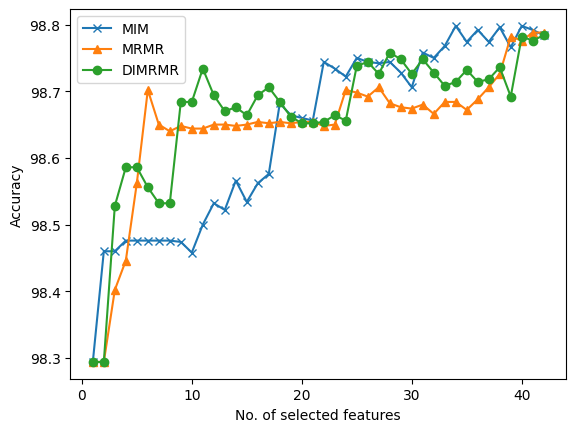

In [184]:
import matplotlib.pyplot as plt


xpoints = np.array(all_columns)
ypoints = np.array(mim_accuracy_results)

plt.plot(xpoints, ypoints, marker='x', label='MIM')

ypoints = np.array(mrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='^', label = 'MRMR')

ypoints = np.array(dimrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='o', label = 'DIMRMR')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
# plt.title("accuracy performance")

plt.legend()
plt.show()

In [42]:
mim_accuracy_results = []
print('running on MIM')
for columns in all_columns:
    features = xk_mim[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    mim_accuracy_results.append(curr_acc)
print(mim_accuracy_results)
mrmr_accuracy_results = []
print('running on MRMR')
for columns in all_columns:
    features = xk_mrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    mrmr_accuracy_results.append(curr_acc)
print(mrmr_accuracy_results)
dimrmr_accuracy_results = []
print('running on DIMRMR')
for columns in all_columns:
    features = xk_dimrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    dimrmr_accuracy_results.append(curr_acc)
print(dimrmr_accuracy_results)

running on MIM
features using: [32]
98.29396599319864
features using: [32, 5]
98.4599699939988
features using: [32, 5, 3]
98.18996999399879
features using: [32, 5, 3, 19]
98.19396999399878
features using: [32, 5, 3, 19, 13]
98.14196559311863
features using: [32, 5, 3, 19, 13, 4]
98.14196559311863
features using: [32, 5, 3, 19, 13, 4, 27]
98.14196559311863
features using: [32, 5, 3, 19, 13, 4, 27, 11]
98.14196559311863
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2]
98.11996559311864
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10]
98.11996559311864
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41]
98.26596799359871
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42]
98.50596879375874
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40]
98.51596919383876
features using: [32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40, 37]
98.52596879375875
[98.29396599319864, 98.4599699939988, 98.18996999399879, 98.19396999399878, 98.14196559311863, 98.14196559311863, 98

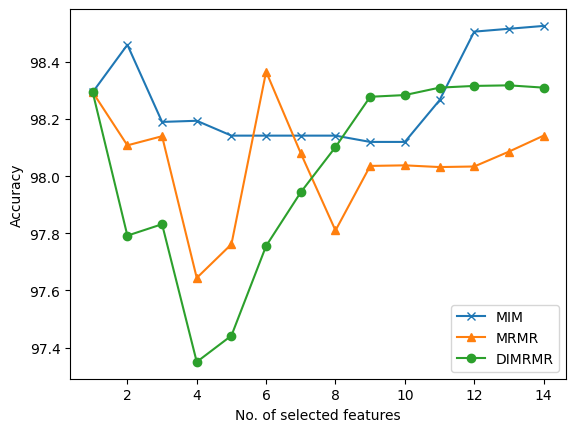

In [43]:
import matplotlib.pyplot as plt


xpoints = np.array(all_columns)
ypoints = np.array(mim_accuracy_results)

plt.plot(xpoints, ypoints, marker='x', label='MIM')

ypoints = np.array(mrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='^', label = 'MRMR')

ypoints = np.array(dimrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='o', label = 'DIMRMR')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
# plt.title("accuracy performance")

plt.legend()
plt.show()

In [44]:
print(mim_accuracy_results)
print(mrmr_accuracy_results)
print(dimrmr_accuracy_results)

[98.29396599319864, 98.4599699939988, 98.18996999399879, 98.19396999399878, 98.14196559311863, 98.14196559311863, 98.14196559311863, 98.14196559311863, 98.11996559311864, 98.11996559311864, 98.26596799359871, 98.50596879375874, 98.51596919383876, 98.52596879375875]
[98.29396599319864, 98.10796599319865, 98.13996599319864, 97.64394598919786, 97.76194878975795, 98.3659775955191, 98.07995279055811, 97.80995799159832, 98.03596399279856, 98.03796399279857, 98.03196399279855, 98.03396399279855, 98.08596519303862, 98.14196599319864]
[98.29396599319864, 97.79196599319863, 97.83196599319865, 97.34993838767754, 97.44194238847768, 97.75595199039809, 97.9439575915183, 98.10195679135828, 98.2779651930386, 98.28396519303861, 98.30996559311862, 98.31596559311862, 98.31796559311863, 98.30996559311863]
